In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
df_train= pd.read_csv('data/train.csv')

In [28]:
df_test = pd.read_csv('data/test.csv')

In [29]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1455 non-null object
LotFrontage      1232 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            107 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1457 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1458 non-

In [5]:
def feature_engineering2(data):
    non_numeric = data.select_dtypes(include=object).columns.tolist()
    no_missing = list()
    for col in non_numeric:
        if data[col].notna().all():
            no_missing.append(col)
    categorize_cols(data, no_missing)
    return 

In [6]:
def categorize_cols(data, columns):
    for col in columns:
        data[col+"_cat"] = pd.factorize(data[col])[0]
    return

In [8]:
sub_train = pd.read_csv("data/train.csv")

In [15]:
feature_engineering2(sub_train)
choosen_cols = choose_cols(sub_train)
print(choosen_cols)
heal_cols(sub_train, choosen_cols)

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'MSZoning_cat', 'Street_cat', 'LotShape_cat', 'LandContour_cat', 'Utilities_cat', 'LotConfig_cat', 'LandSlope_cat', 'Neighborhood_cat', 'Condition1_cat', 'Condition2_cat', 'BldgType_cat', 'HouseStyle_cat', 'RoofStyle_cat', 'RoofMatl_cat', 'Exterior1st_cat', 'Exterior2nd_cat', 'ExterQual_cat', 'ExterCond_cat', 'Foundation_cat', 'Heating_cat', 'HeatingQC_cat', 'CentralAir_cat', 'KitchenQual_cat', 'Functional_cat', 'PavedDrive_cat', 'SaleType_cat', 'SaleCondition_cat']


In [16]:
sub_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 108 entries, Id to SaleCondition_cat
dtypes: float64(3), int64(62), object(43)
memory usage: 1.2+ MB


In [17]:
X = sub_train[choosen_cols]

In [18]:
y = sub_train['SalePrice']

In [19]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [10]:
def mae(model, trX, valX, trY, valY):
    model.fit(trX,trY)
    predictionTest = model.predict(valX)
    predictionTrain = model.predict(trX)
    return mean_absolute_error(valY, predictionTest), mean_absolute_error(trY,predictionTrain)

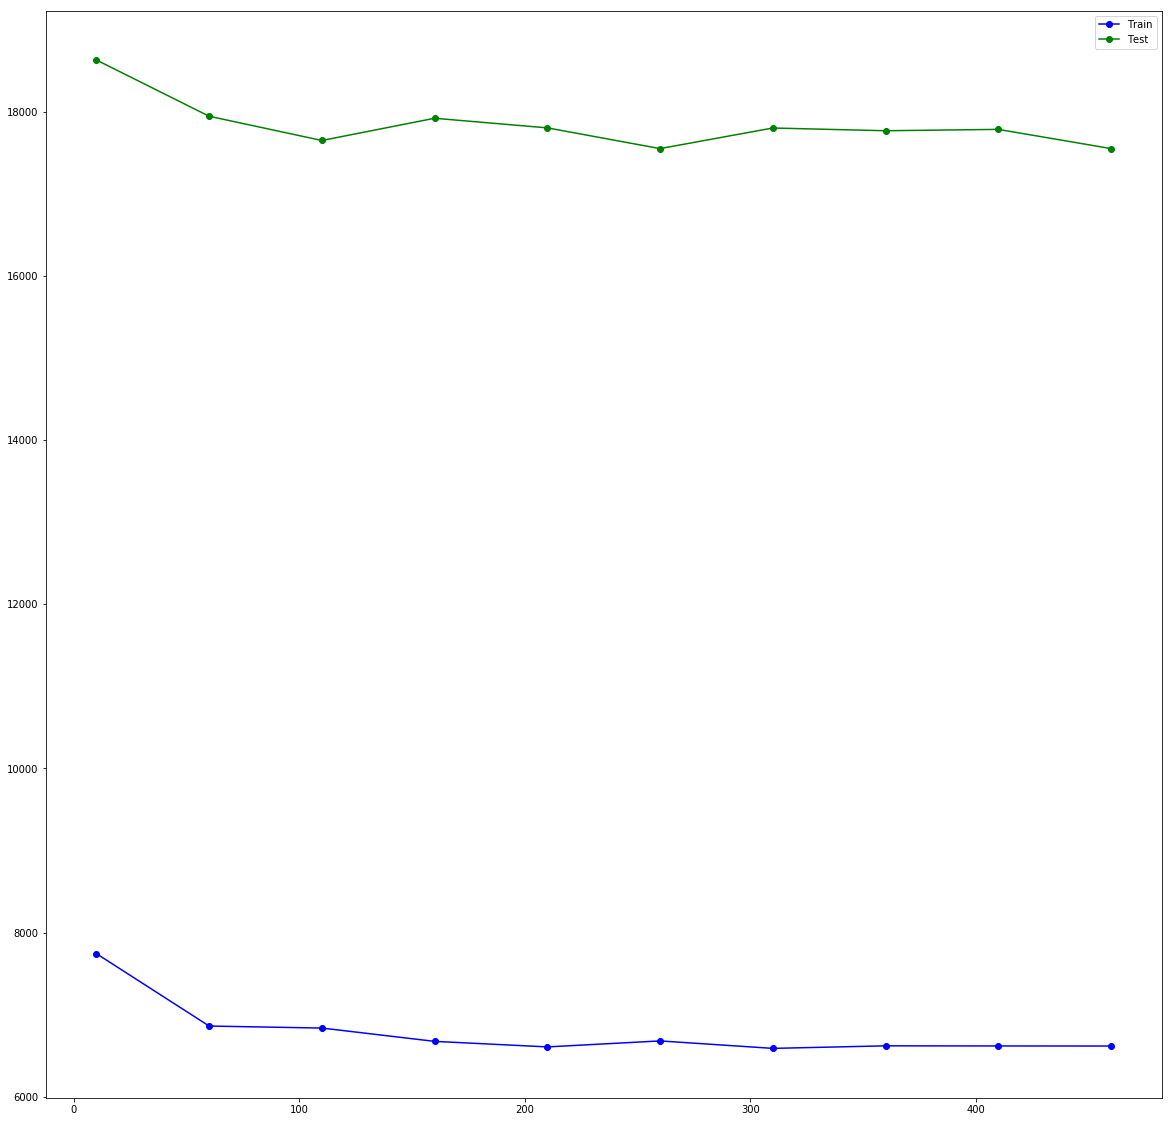

17555.1822108735
best max_leaf is 260


In [24]:
train_result = list()
test_result = list()
leafs = list()
min_test = 10000000
best_leaf = 5007
for max_leaf in range(10,500,50):
    model = RandomForestRegressor(n_estimators=max_leaf)
    test , train = mae(model,X_train, X_test, y_train, y_test)
    train_result.append(train)
    test_result.append(test)
    min_test = min(min_test, test)
    if min_test == test:
        best_leaf = max_leaf
    leafs.append(max_leaf)
plt.figure(figsize=(20,20))
plt.plot(leafs, train_result, 'bo-', label='Train')
plt.plot(leafs, test_result, 'go-', label='Test')
plt.legend(loc='best')
plt.show()
print(min_test)
print('best max_leaf is %d'%(best_leaf))

In [11]:
def feature_engineering(data):
    data['Neighborhood_cat'] = pd.factorize(data.Neighborhood)[0]
    data['LotShape_cat'] = pd.factorize(data.LotShape)[0]
    data['BldgType_cat'] = pd.factorize(data.BldgType)[0]
    data['HouseStyle_cat'] = pd.factorize(data.HouseStyle)[0]
    data['MSZoning_cat'] = pd.factorize(data.MSZoning)[0]
    

In [12]:
def heal_cols(data,cols):
    for col in cols:
        data[col].fillna(value=int(data[col].mean()), inplace=True)
    

In [13]:
def choose_cols(data):
    black_list = ['Id', 'SalePrice']
    choosen_cols = data.select_dtypes(include=np.number).columns.tolist()
    for col in choosen_cols:
        if col in black_list:
            choosen_cols.remove(col)
    return choosen_cols

In [26]:
def make_prediction( model, test_data, train_data):
    feature_engineering2(test_data)
    feature_engineering2(train_data)
    choosen_cols = choose_cols(train_data)
    print(choosen_cols)
    heal_cols(test_data, choosen_cols)
    heal_cols(train_data, choosen_cols)
    test_X = test_data[choosen_cols]
    train_X = train_data[choosen_cols]
    train_y = train_data['SalePrice']
    model.fit(train_X, train_y)
    prediction = model.predict(test_X)
    solution = pd.DataFrame({'Id':test_data.Id, 'SalePrice':prediction})
    solution.to_csv('output/solution_more_cols_cat_nest_cols.csv', index=False)

In [27]:
model = RandomForestRegressor(n_estimators = 260, random_state = 0)
make_prediction(model, df_test, df_train)


['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'MSZoning_cat', 'Street_cat', 'LotShape_cat', 'LandContour_cat', 'Utilities_cat', 'LotConfig_cat', 'LandSlope_cat', 'Neighborhood_cat', 'Condition1_cat', 'Condition2_cat', 'BldgType_cat', 'HouseStyle_cat', 'RoofStyle_cat', 'RoofMatl_cat', 'Exterior1st_cat', 'Exterior2nd_cat', 'ExterQual_cat', 'ExterCond_cat', 'Foundation_cat', 'Heating_cat', 'HeatingQC_cat', 'CentralAir_cat', 'KitchenQual_cat', 'Functional_cat', 'PavedDrive_cat', 'SaleType_cat', 'SaleCondition_cat']


KeyError: 'MSZoning_cat'

In [ ]:
grouped_data = avg_price_data.groupby('YearBuilt').mean()

In [ ]:
grouped_data.sort_values('YearBuilt', inplace=True)
grouped_data.head()

In [ ]:
grouped_data.plot();